# Data Visualization for Information generated with Spark 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## First, we will look at the CitiBike data derived from our Spark process

### The Count of Trips throughout time occured as follows: 

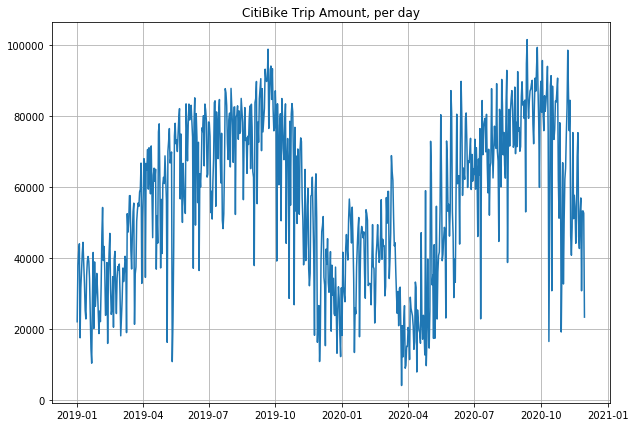

In [2]:
df = pd.read_csv("citibike-daily-counttrips.csv", names=["date", "count"])
df["date"] = pd.to_datetime(df['date'])

f, ax = plt.subplots()
ax.plot(df["date"], df["count"])
ax.set_title('CitiBike Trip Amount, per day')
ax.grid(True)
f.set_figheight(7)
f.set_figwidth(10)

plt.show()

It is too choppy to see any real trends, so we instead look at the monthly file

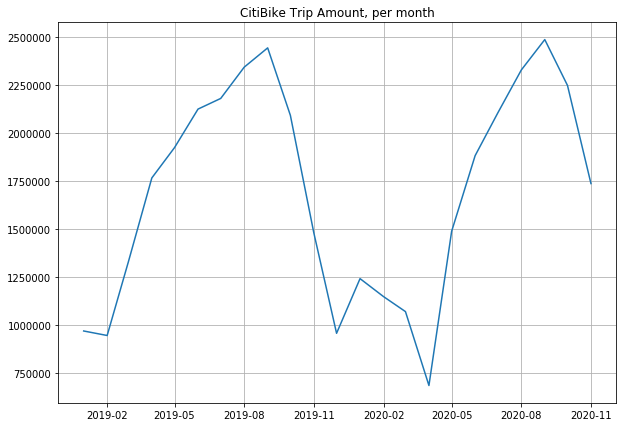

In [3]:
df = pd.read_csv("citibike-monthly-counttrips.csv", names=["date", "count"])
df["date"] = pd.to_datetime(df['date'])

f, ax = plt.subplots()
ax.plot(df["date"], df["count"])
ax.set_title('CitiBike Trip Amount, per month')
ax.grid(True)
f.set_figheight(7)
f.set_figwidth(10)

plt.show()

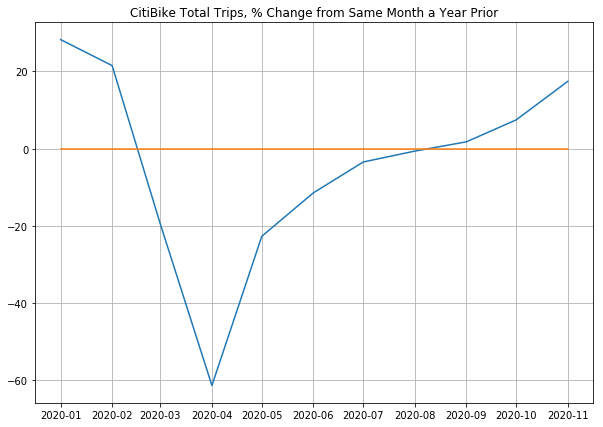

In [4]:
df = pd.read_csv("citibike-monthly-counttrips.csv", names=["date", "count"])
df["date"] = pd.to_datetime(df['date'])

prev_year = df["count"][df["date"] < "2019-12"].reset_index()
# we do not include december, since we do not have data for it in 2020
curr_year = df["count"][df["date"] >= "2020-01"].reset_index()

dates = df["date"][df["date"] >= "2020-01"]
diffs_count = (curr_year - prev_year) / prev_year * 100

f, ax = plt.subplots()
ax.plot(dates, diffs_count["count"])
ax.plot(dates, [0] * len(dates))
ax.set_title('CitiBike Total Trips, % Change from Same Month a Year Prior')
ax.grid(True)
f.set_figheight(7)
f.set_figwidth(10)

plt.show()

### The Total Hours of Trips throughout time occured as follows: 

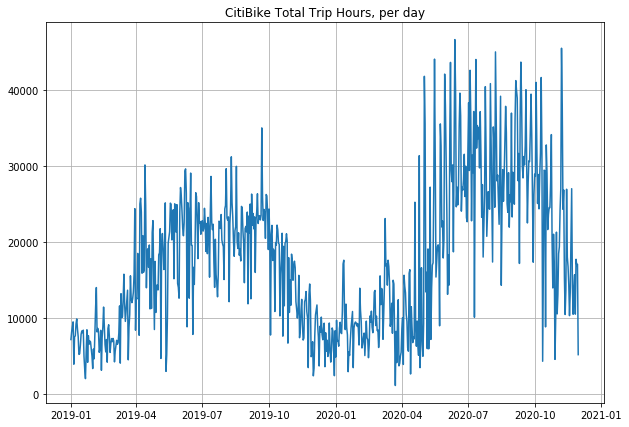

In [5]:
df = pd.read_csv("citibike-daily-sumtriphours.csv", names=["date", "count"])

df["date"] = pd.to_datetime(df['date'])

f, ax = plt.subplots()
ax.plot(df["date"], df["count"])
ax.set_title('CitiBike Total Trip Hours, per day')
ax.grid(True)
f.set_figheight(7)
f.set_figwidth(10)

plt.show()

Again, the changes are too choppy to see any real trends, so we instead look at the monthly file

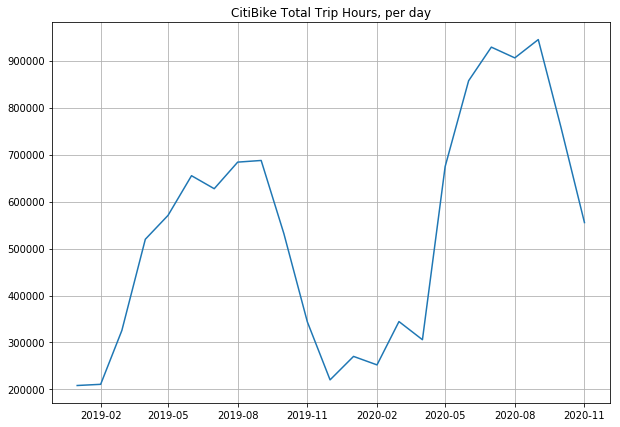

In [6]:
df = pd.read_csv("citibike-monthly-sumtriphours.csv", names=["date", "count"])
df["date"] = pd.to_datetime(df['date'])

f, ax = plt.subplots()
ax.plot(df["date"], df["count"])
ax.set_title('CitiBike Total Trip Hours, per day')
ax.grid(True)
f.set_figheight(7)
f.set_figwidth(10)

plt.show()

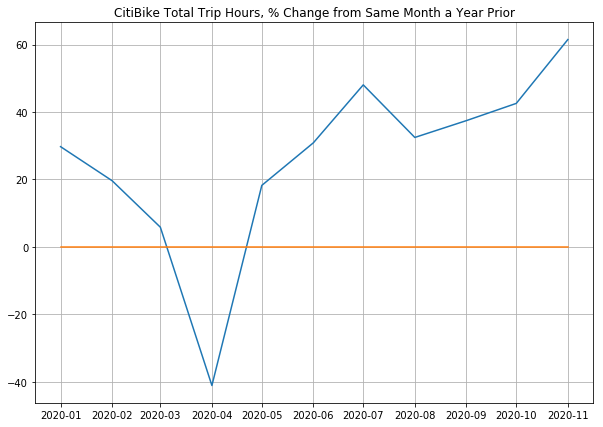

In [7]:
df = pd.read_csv("citibike-monthly-sumtriphours.csv", names=["date", "count"])
df["date"] = pd.to_datetime(df['date'])

prev_year = df["count"][df["date"] < "2019-12"].reset_index()
# we do not include december, since we do not have data for it in 2020
curr_year = df["count"][df["date"] >= "2020-01"].reset_index()

dates = df["date"][df["date"] >= "2020-01"]
diffs_hours = (curr_year - prev_year) / prev_year * 100

f, ax = plt.subplots()
ax.plot(dates, diffs_hours["count"])
ax.plot(dates, [0] * len(dates))
ax.set_title('CitiBike Total Trip Hours, % Change from Same Month a Year Prior')
ax.grid(True)
f.set_figheight(7)
f.set_figwidth(10)

plt.show()

### Now both trends together:

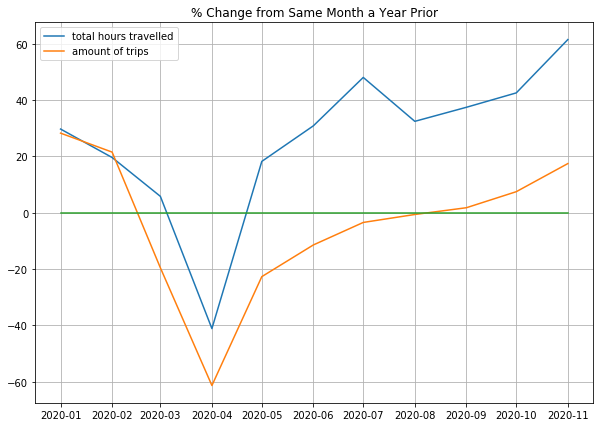

In [8]:
f, ax = plt.subplots()
ax.plot(dates, diffs_hours["count"])
ax.plot(dates, diffs_count["count"])
ax.plot(dates, [0] * len(dates))
ax.set_title('% Change from Same Month a Year Prior')
ax.grid(True)
f.set_figheight(7)
f.set_figwidth(10)

plt.legend(["total hours travelled", "amount of trips"])
plt.show()

## Now, we will look at the MTA Bridges & Tunnels data, also derived from our Spark process

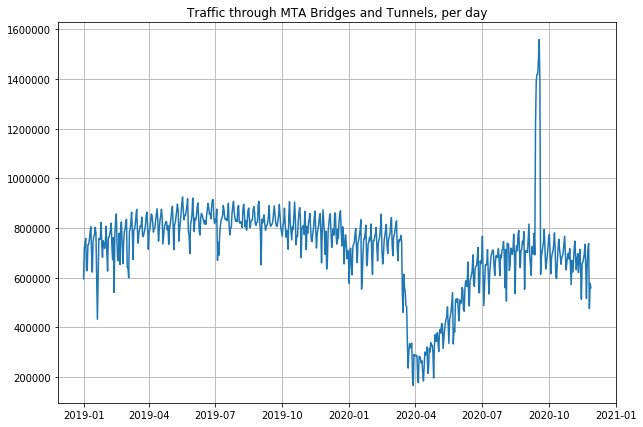

          date    count
615 2020-09-11   779050
616 2020-09-12   691993
617 2020-09-13  1220734
618 2020-09-14  1391462
619 2020-09-15  1418720
620 2020-09-16  1418914
621 2020-09-17  1475648
622 2020-09-18  1558068
623 2020-09-19  1392224
624 2020-09-20   614145
625 2020-09-21   684092
626 2020-09-22   702240


In [9]:
df = pd.read_csv("bridges-tunnels-daily-sumtraffic.csv", names=["date", "count"])
df["date"] = pd.to_datetime(df['date'])

f, ax = plt.subplots()
ax.plot(df["date"], df["count"])
ax.set_title('Traffic through MTA Bridges and Tunnels, per day')
ax.grid(True)
f.set_figheight(7)
f.set_figwidth(10)

plt.show()

print(df[(df["date"] > "2020-09-10") & (df["date"] < "2020-09-23")])

Why the spike in the week of the 13th to the 20th of September 2020?

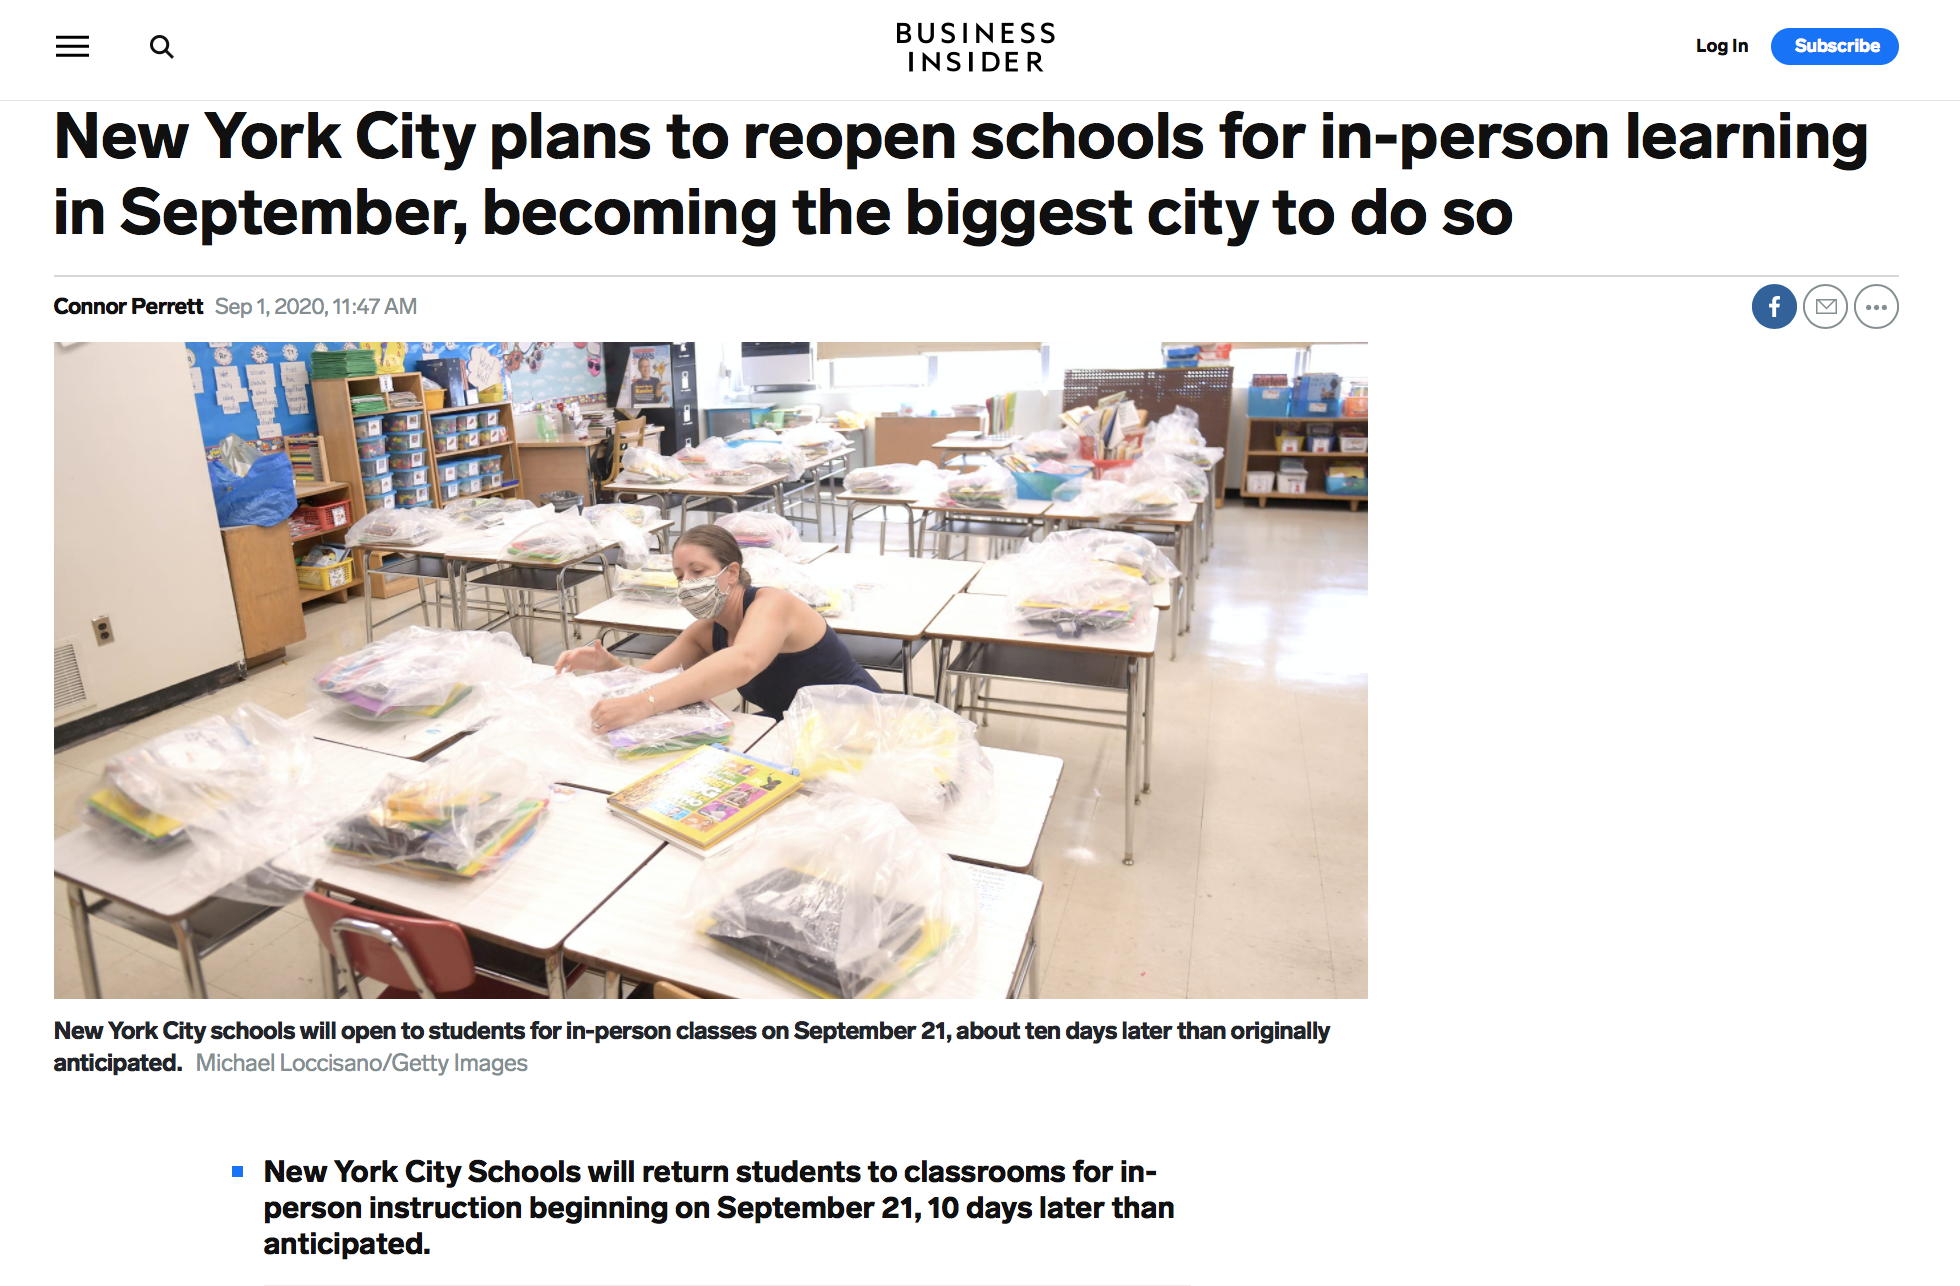

## We now move to the national TSA daily data

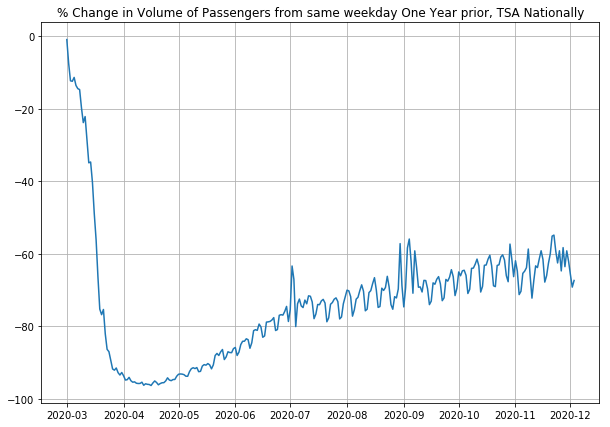

In [10]:
df = pd.read_csv("tsa-daily-travelers.csv", names=["date", "count"])
df["date"] = pd.to_datetime(df['date'])
df = df.sort_values("date")

prev_year = df["count"][df["date"] < "2020-01"].reset_index()
curr_year = df["count"][df["date"] >= "2020-01"].reset_index()

dates = df["date"][df["date"] >= "2020-01"]
diffs = (curr_year - prev_year) / prev_year * 100

f, ax = plt.subplots()
ax.plot(dates, diffs["count"])

ax.set_title('% Change in Volume of Passengers from same weekday One Year prior, TSA Nationally')
ax.grid(True)
f.set_figheight(7)
f.set_figwidth(10)

plt.show()